In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\archive\911.csv')

In [4]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [7]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [13]:
df['title'].nunique()

148

In [17]:
x=df['title'].iloc[0]

In [18]:
x.split(':')[0]

'EMS'

In [19]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [22]:
df['Reason'].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

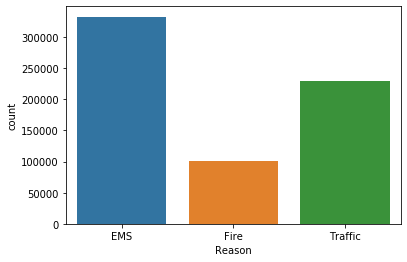

In [23]:
sns.countplot(x='Reason',data=df)

In [28]:
type(df['timeStamp'].iloc[0])

str

In [35]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [36]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [37]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [39]:
time.dayofweek

3

In [41]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [43]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [44]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [45]:
df['month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: month, Length: 663522, dtype: int64

In [46]:
df['dayofweek']

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: dayofweek, Length: 663522, dtype: int64

In [49]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


__Finance Project__

In [58]:
import datetime
from pandas_datareader import data, wb


In [55]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [64]:
BAC = data.DataReader('BAC', 'yahoo',start, end)

In [65]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.280807
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.916729
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.960411
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.909451
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.931290
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.509130
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.383405
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.518112
